# Timeseries related coverages demo

In this notebook we use the backend API to retrieve a time series and then plot it, along with its related coverages

In [1]:
%matplotlib widget

import httpx
import matplotlib.pyplot as plt
import pandas as pd


def _parse_to_dataframe(time_series: dict):
    df = pd.DataFrame.from_records(time_series["values"])
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)
    return df    


api_url = "http://webapp:5001/api/v2/coverages/time-series/{coverage_identifier}"

## Seasonal data

In [28]:
coverage_identifier = "tas_seasonal_absolute_model_ensemble-rcp26-DJF"
point_coords = "POINT(11.5469 44.9524)"
date_range = "../.."


raw_response = httpx.get(
    api_url.format(coverage_identifier=coverage_identifier),
    params={
        "coords": point_coords,
        "datetime": date_range,
        "include_coverage_data": True,
        "include_observation_data": True,
        "coverage_data_smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_11_YEARS",
            "LOESS_SMOOTHING",
        ],
        "include_coverage_uncertainty": False,
        "include_coverage_related_data": False,
    }
)
try:
    raw_response.raise_for_status()
except httpx.HTTPStatusError as err:
    print(raw_response.json())
    raise

raw_series = raw_response.json()["series"]

seasonal_series = {s["name"]: s for s in raw_series}

seasonal_dfs = {}
for seasonal_ in seasonal_series.values():
    identifier = " - ".join((
        seasonal_["translations"]["series_name"]["it"],
        seasonal_["translations"]["processing_method"]["it"]
    ))
    seasonal_dfs[identifier] = _parse_to_dataframe(seasonal_)


# seasonal_dfs = {v["translations"]["series_name"]["it"]: _parse_to_dataframe(v) for v in seasonal_series.values()}

In [30]:
raw_series

[{'name': 'tas_seasonal_absolute_model_ensemble-rcp26-DJF__NO_SMOOTHING',
  'values': [{'value': 2.640222, 'datetime': '1976-02-15T12:00:00Z'},
   {'value': 4.131799, 'datetime': '1977-02-14T17:57:04.390000Z'},
   {'value': 2.9139953, 'datetime': '1978-02-14T23:54:08.780000Z'},
   {'value': 3.9587035, 'datetime': '1979-02-15T05:51:13.171000Z'},
   {'value': 3.5937133, 'datetime': '1980-02-15T11:48:17.561000Z'},
   {'value': 3.7524657, 'datetime': '1981-02-14T17:45:21.951000Z'},
   {'value': 3.8758483, 'datetime': '1982-02-14T23:42:26.341000Z'},
   {'value': 3.5044188, 'datetime': '1983-02-15T05:39:30.732000Z'},
   {'value': 2.284906, 'datetime': '1984-02-15T11:36:35.122000Z'},
   {'value': 4.2877746, 'datetime': '1985-02-14T17:33:39.512000Z'},
   {'value': 3.3630004, 'datetime': '1986-02-14T23:30:43.902000Z'},
   {'value': 2.611383, 'datetime': '1987-02-15T05:27:48.293000Z'},
   {'value': 3.5216613, 'datetime': '1988-02-15T11:24:52.683000Z'},
   {'value': 3.7202392, 'datetime': '1989-0

### Plotting

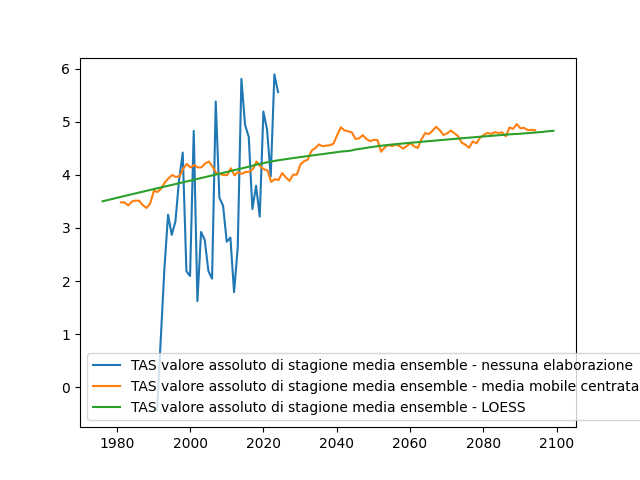

In [29]:
fig, ax = plt.subplots()

for name, df in seasonal_dfs.items():
    ax.plot(df, label=name)


ax.legend()

In [26]:
ax.clear()

## Yearly data

In [14]:
coverage_identifier = "tas_annual_absolute_model_ensemble-rcp26"
point_coords = "POINT(11.5469 44.9524)"
date_range = "../.."


raw_response = httpx.get(
    api_url.format(coverage_identifier=coverage_identifier),
    params={
        "coords": point_coords,
        "datetime": date_range,
        "include_coverage_data": True,
        "include_observation_data": True,
        "coverage_data_smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_11_YEARS",
            "LOESS_SMOOTHING",
        ],
        "include_coverage_uncertainty": False,
        "include_coverage_related_data": False,
    }
)
try:
    raw_response.raise_for_status()
except httpx.HTTPStatusError as err:
    print(raw_response.json())
    raise

yearly_raw_series = raw_response.json()["series"]

yearly_series = {s["name"]: s for s in yearly_raw_series}

yearly_dfs = {v["name"]: _parse_to_dataframe(v) for v in yearly_series.values()}

### Plotting

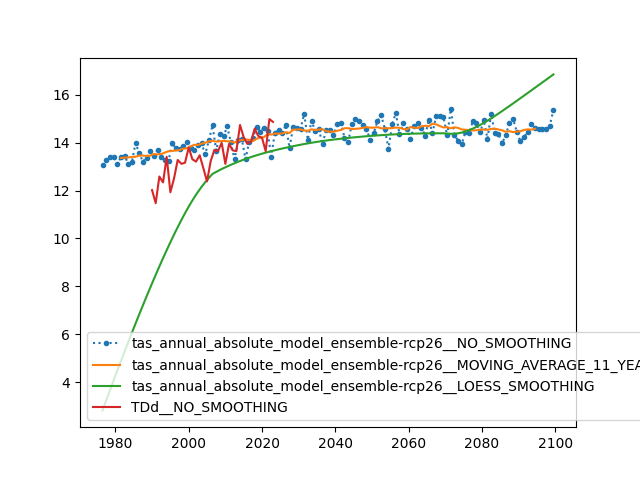

In [15]:
fig, ax = plt.subplots()

raw_tas_line, = ax.plot(
    yearly_dfs[f"{coverage_identifier}__NO_SMOOTHING"], 
    label=f"{coverage_identifier}__NO_SMOOTHING"
)
raw_tas_line.set_linestyle(":")
raw_tas_line.set_marker(".")

already_plotted = (
    f"{coverage_identifier}__NO_SMOOTHING",
)
for name, df in yearly_dfs.items():
    if name not in already_plotted:
        ax.plot(df, label=name)


ax.legend()